# Python Plots for LGalaxies

## Import Libraries and Read Catalogs

<p>Use functions read_snap or read_tree to read catalogs. These are both defined in procedures.py. In case of read_snap, SnapshotList will be returned containing the list of snapshots read (usefull to later select galaxies in a given redshift).<p>

In [132]:
import numpy as np
%matplotlib inline

import pandas as pd

%pylab inline
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *
from matplotlib import animation

import procedures
reload (procedures)
from procedures import *
import plots_input
reload (plots_input)
from plots_input import *

FirstFile = 40
LastFile =  40

Volume_MR = (BoxSize_MR**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 
Volume_MRII = (BoxSize_MRII**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 

if CatalogType=='snap':
    from LGalaxies_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_Henriques2015a_struct import PropertiesToRead
    (G_MR, SnapshotList) = read_snap(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead,LGalaxiesStruct,RedshiftsToRead,RedshiftList)
    
if CatalogType=='tree':    
    from LGalaxies_tree_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_tree_Henriques2015a_struct import PropertiesToRead_tree    
    (G_MR) = read_tree(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead_tree,LGalaxiesStruct,RedshiftsToRead,RedshiftList)    
     
    SnapshotList = np.zeros(len(RedshiftList),dtype=np.int32)
    for ii in range(0,len(RedshiftList)):                  
        G0=G_MR[ np.rint(G_MR['Redshift']*100.) == RedshiftList[ii]*100. ]             
        SnapshotList[ii]=G0['SnapNum'][0]
#endif      

print('reading done\n')
#print (np.log10(gal['StellarMass'][1:5]*1.e10))
#help(gal)


Populating the interactive namespace from numpy and matplotlib


Reading Headers

TotNgals= [1764817]


File  40  nGals =  [1764817]
reading done



## Plots

In [56]:
plt.rcParams.update({'font.size': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.linewidth': 2, 
                     'xtick.major.size': 6, 'xtick.major.width': 1.5, 
                     'ytick.major.size': 6, 'ytick.major.width': 1.5, 
                     'xtick.minor.size': 3, 'xtick.minor.width': 1.,                   
                     'ytick.minor.size': 3, 'ytick.minor.width': 1.})

/export/data1/Workspace/GitHub_Python_plots/env/local/lib/python3.4/site-packages/matplotlib/animation.py:752: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


RuntimeError: Error creating movie, return code: 1 Try running with --verbose-debug

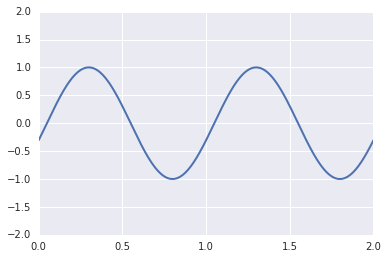

In [134]:
#with PdfPages('./fig/plots.pdf') as pdf:
aa=1
if aa==1:
    import plots
    reload (plots)
    
    if opt_stellar_mass_function==1:
        from plots import stellar_mass_function
        stellar_mass_function(G_MR, SnapshotList, Volume_MR, pdf)
        
    if opt_bluck_red_fractions==1:
        from plots import bluck_red_fractions
        bluck_red_fractions(G_MR, SnapshotList, pdf)
             
    if opt_test_plots==1:
        from plots import test_plots     
        test_plots(G_MR, SnapshotList, pdf)
        
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [], lw=2)    
   
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=200, interval=20, blit=True)
    
    anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
    plt.show()
        
    if opt_gr_mass==1:
        xmin=9.4
        xmax=11.
        ymin=0.2
        ymax=1.0
        bin=0.1


        #plt.rcParams.update({'xtick.major.width': 1.0, 'ytick.major.width': 1.0, 
                             #'xtick.minor.width': 1.0, 'ytick.minor.width': 1.0})

        fig = plt.figure(figsize=(9,9)) 
        #subplot=plt.subplot()
        #subplot.set_ylim([ymin, ymax]), subplot.set_xlim([xmin, xmax])         
        #xlab='$log_{10}(M_*[h^{-2}M_{\odot}])$'          
        #ylab='$log_{10}(\phi [h^3 Mpc^{-3} log_{10}(M^{-1})])$'             
        #subplot.set_xlabel(xlab, fontsize=16), subplot.set_ylabel(ylab, fontsize=16)
       
    
        #MODEL    
        sel= (G_MR['SnapNum']==SnapshotList[0])          
        G0_MR=G_MR[sel]        
        G0_MR=G0_MR[G0_MR['StellarMass']>0.1]
        Ngals=len(G0_MR)
        StellarMass=(np.log10(G0_MR['StellarMass']*1.e10*Hubble_h))     
        color_gr=G0_MR['MagDust'][:,16]-G0_MR['MagDust'][:,17]          
        d = {'StellarMass' : pd.Series(StellarMass,index=np.zeros(Ngals,dtype=np.int32)),
             'color_gr'    : pd.Series(color_gr,index=np.zeros(Ngals,dtype=np.int32))}       
        df = pd.DataFrame(d)
        
        #joint plots    
        g = sns.JointGrid(x="StellarMass", y="color_gr", data=df, xlim=(xmin, xmax), ylim=(ymin, ymax))  
        g.plot_joint(sns.kdeplot, shade=True, n_levels=20, cut=10., bw=0.2, shade_lowest=False)  
        g.plot_marginals(sns.distplot)  
    
        
        #ani = animation.FuncAnimation(fig,update_img,300,interval=30)
        #writer = animation.writers['ffmpeg'](fps=30)
        #ani.save('./demo.mp4',writer=writer,dpi=dpi)
        
        #LABELS      
        #subplot.text(7.4, 0.0, 'Observations used in MCMC', fontsize= 13)
        #subplot.errorbar(7.3, 0.12, yerr=0.1, fmt='o', markersize=5, color='blue')
    
        #subplot.text(7.7, -5.0, 'This Work', fontsize= 13)
        #subplot.plot([7.3,7.6], [-4.9,-4.9], linestyle='-', linewidth=2, color='red')    
   

        #plt.tight_layout()
        #plt.savefig('./fig/plots_gr_colour.pdf')
        #pdf.savefig()
        #plt.close()
        
    #endif opt_gr_mass==1:
  